In [98]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,SGDRegressor
from sklearn.preprocessing import PolynomialFeatures,StandardScaler
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline
import warnings
warnings.filterwarnings('ignore')

In [99]:
X = 6 * np.random.rand(200, 1) - 3
y = 0.8 * X**2 + 0.9 * X + 2 + np.random.randn(200, 1)

# y = 0.8x^2 + 0.9x + 2

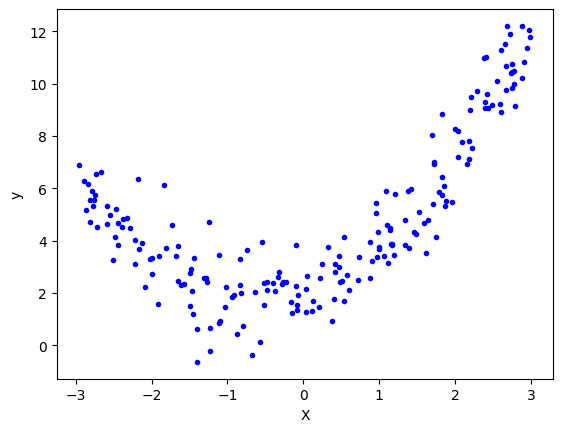

In [100]:
plt.plot(X, y,'b.')
plt.xlabel("X")
plt.ylabel("y")
plt.show()

In [101]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

## Simple Linear Regression :

In [102]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [103]:
y_pred = lr.predict(X_test)
print("R2 Score :",r2_score(y_test,y_pred))

R2 Score : 0.45339596356893974


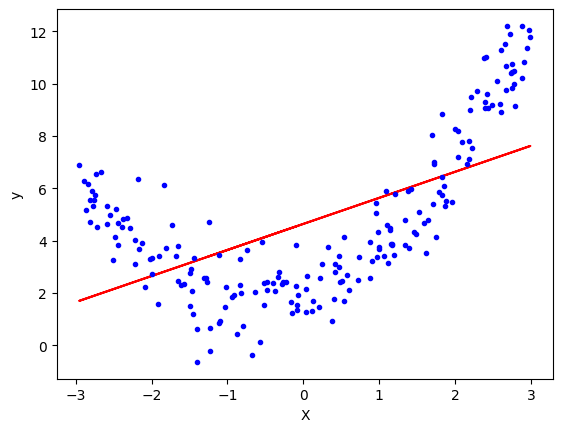

In [104]:
plt.plot(X_train,lr.predict(X_train),color='r')
plt.plot(X, y, "b.")
plt.xlabel("X")
plt.ylabel("y")
plt.show()

## Polynomial Linear Regression :

In [ ]:
poly = PolynomialFeatures(degree=2,include_bias=True)

X_train_trans = poly.fit_transform(X_train)
X_test_trans = poly.transform(X_test)

In [ ]:
poly.powers_    # If (include_bias=False) , then [x] -> [x^1, x1^2]

array([[0],
       [1],
       [2]], dtype=int64)

In [107]:
print(X_train[0])
print(X_train_trans[0])  # [x] -> [x^0, x^1, x1^2]

[-1.2476261]
[ 1.         -1.2476261   1.55657089]


In [108]:
lr = LinearRegression()
lr.fit(X_train_trans,y_train)

LinearRegression()

In [109]:
y_pred = lr.predict(X_test_trans)
print("R2 Score :",r2_score(y_test,y_pred))

R2 Score : 0.900006669330093


In [110]:
print(lr.coef_)
print(lr.intercept_)

[[0.         0.92858248 0.80738501]]
[2.09556043]


In [111]:
X_new=np.linspace(-3, 3, 200).reshape(200, 1)
X_new_poly = poly.transform(X_new)
y_new = lr.predict(X_new_poly)

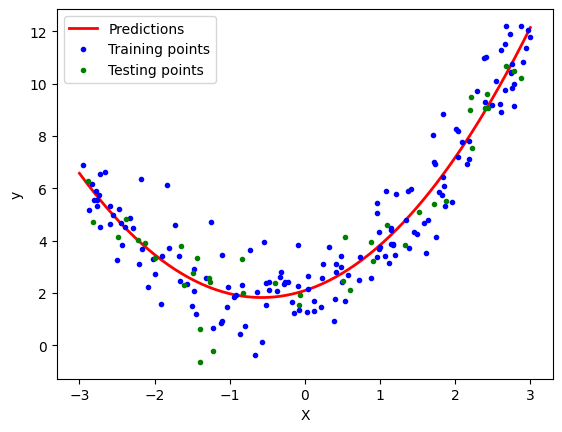

In [112]:
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.plot(X_train, y_train, "b.",label='Training points')
plt.plot(X_test, y_test, "g.",label='Testing points')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

### NOTE :

Higher Degree :- Risk of `Overfitting`

Lower Degree  :- Risk of `Underfitting`

In [113]:
def polynomial_regression(degree):
    X_new=np.linspace(-3, 3, 100).reshape(100, 1)
    X_new_poly = poly.transform(X_new)

    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
                            ("poly_features", polybig_features),
                            ("std_scaler", std_scaler),
                            ("lin_reg", lin_reg),
                              ])
    
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)

    plt.plot(X_new, y_newbig,'r', label="Degree " + str(degree), linewidth=2)

    plt.plot(X_train, y_train, "b.", linewidth=3)
    plt.plot(X_test, y_test, "g.", linewidth=3)
    plt.legend(loc="upper left")
    plt.xlabel("X")
    plt.ylabel("y")
    plt.axis([-3, 3, 0, 10])
    plt.show()

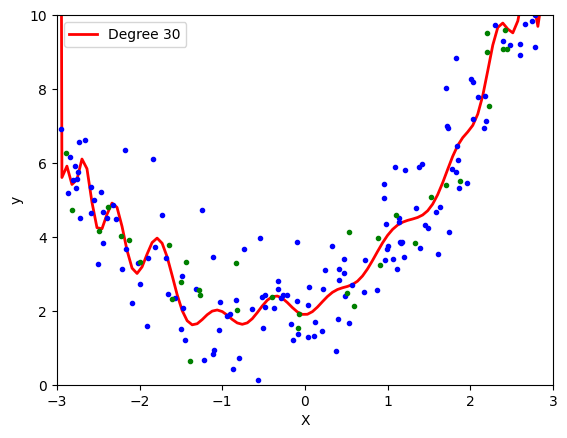

In [114]:
polynomial_regression(30)

## Gradient Descent :

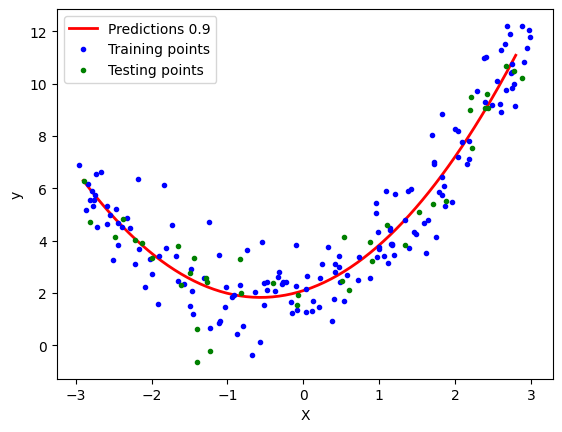

In [ ]:
poly = PolynomialFeatures(degree=2)

X_train_trans = poly.fit_transform(X_train)
X_test_trans = poly.transform(X_test)

sgd = SGDRegressor(max_iter=100)
sgd.fit(X_train_trans,y_train)

X_new=np.linspace(-2.9, 2.8, 200).reshape(200, 1)
X_new_poly = poly.transform(X_new)

y_new = sgd.predict(X_new_poly)

y_pred = sgd.predict(X_test_trans)

plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions " + str(round(r2_score(y_test,y_pred),2)))
plt.plot(X_train, y_train, "b.",label='Training points')
plt.plot(X_test, y_test, "g.",label='Testing points')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()